# Module 4 : Implementation of  Random Forest algorithm

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# warning
import warnings
warnings.filterwarnings("ignore")

In [5]:
# load given data
data = pd.read_csv("data1.csv")

In [6]:
data.head()

,S.NO,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [7]:
data["Dataset"].unique()

array([1, 2], dtype=int64)

In [8]:
data.duplicated().sum()

0

In [9]:
data.shape

(5830, 12)

In [10]:
data = data.drop_duplicates()

In [11]:
data.shape

(5830, 12)

In [12]:
data.isnull().sum()

S.NO                           0
Age                            0
Gender                         0
Total_Bilirubin                0
Direct_Bilirubin               0
Alkaline_Phosphotase           0
Alamine_Aminotransferase       0
Aspartate_Aminotransferase     0
Total_Protiens                 0
Albumin                        0
Albumin_and_Globulin_Ratio    40
Dataset                        0
dtype: int64

In [13]:
df=data.dropna()

In [14]:
df.shape

(5790, 12)

In [15]:
df.isnull().sum()

S.NO                          0
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [16]:
#changing feature name
df = df.rename({'Dataset': 'Result'}, axis=1) 

In [17]:
df.columns

Index(['S.NO', 'Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Result'],
      dtype='object')

In [18]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(int)


In [19]:
df.Result.value_counts()

1    4140
2    1650
Name: Result, dtype: int64

In [20]:
df.corr()

,S.NO,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Result
S.NO,1.000000,-0.005243,-0.003192,0.010129,0.013613,-0.007964,-0.012584,-0.009487,0.019032,0.006630,-0.002493,0.001859
Age,-0.005243,1.000000,0.055881,0.011000,0.006784,0.078878,-0.087799,-0.020499,-0.186248,-0.264211,-0.216408,-0.133164
Gender,-0.003192,0.055881,1.000000,0.088068,0.099160,-0.029368,0.081339,0.079421,-0.095149,-0.095579,-0.003424,-0.081349
Total_Bilirubin,0.010129,0.011000,0.088068,1.000000,0.874481,0.205739,0.213375,0.237323,-0.007906,-0.222087,-0.206267,-0.220218
Direct_Bilirubin,0.013613,0.006784,0.099160,0.874481,1.000000,0.234008,0.233180,0.257022,0.000033,-0.228409,-0.200125,-0.246273
Alkaline_Phosphotase,-0.007964,0.078878,-0.029368,0.205739,0.234008,1.000000,0.124777,0.166580,-0.027062,-0.163419,-0.234166,-0.183363
Alamine_Aminotransferase,-0.012584,-0.087799,0.081339,0.213375,0.233180,0.124777,1.000000,0.791862,-0.042432,-0.028658,-0.002375,-0.163117
Aspartate_Aminotransferase,-0.009487,-0.020499,0.079421,0.237323,0.257022,0.166580,0.791862,1.000000,-0.025751,-0.084915,-0.070040,-0.151834
Total_Protiens,0.019032,-0.186248,-0.095149,-0.007906,0.000033,-0.027062,-0.042432,-0.025751,1.000000,0.783112,0.234887,0.033614
Albumin,0.006630,-0.264211,-0.095579,-0.222087,-0.228409,-0.163419,-0.028658,-0.084915,0.783112,1.000000,0.689632,0.159770


In [21]:
X = df.drop(labels='Result', axis=1)
#Response variable
y = df.loc[:,'Result']    

In [22]:
# now let's evaluate its performance on the test set.
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [23]:

#We'll use a test size of 30%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# RANDOM FOREST:


Classification report of Random Forest Results:

              precision    recall  f1-score   support

           1       0.80      1.00      0.89      1242
           2       0.97      0.39      0.56       495

    accuracy                           0.82      1737
   macro avg       0.89      0.69      0.72      1737
weighted avg       0.85      0.82      0.80      1737

Accuracy result of Random Forest is: 82.32584916522741

Confusion Matrix result of Random Forest is:
 [[1236    6]
 [ 301  194]]

Sensitivity :  0.9951690821256038

Specificity :  0.39191919191919194

Cross validation test results of accuracy:
[0.83765112 0.8298791  0.83074266 0.84455959 0.83074266]

Accuracy result of Random Forest is: 83.47150259067358


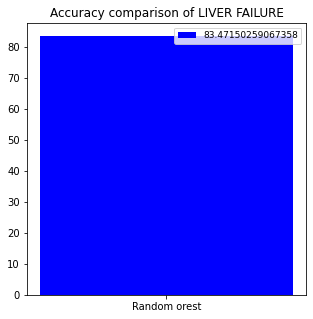

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(max_depth=5)

rfc.fit(X_train,y_train)

predictR = rfc.predict(X_test)

print("")
print('Classification report of Random Forest Results:')
print("")

print(classification_report(y_test,predictR))
x = (accuracy_score(y_test,predictR)*100)

print('Accuracy result of Random Forest is:', x)
print("")
cm1=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of Random Forest is:\n',cm1)
print("")
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print("")

accuracy = cross_val_score(rfc, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
#get the mean of each fold 
print("")
print("Accuracy result of Random Forest is:",accuracy.mean() * 100)
RFC=accuracy.mean() * 100





def graph():
    import matplotlib.pyplot as plt
    data=[RFC]
    alg="Random orest"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("b"))
    plt.title("Accuracy comparison of LIVER FAILURE")
    plt.legend(b,data,fontsize=9)




graph()


True Positive : 194
True Negative : 301
False Positive : 6
False Negative : 1236

True Positive Rate : 0.13566433566433567
True Negative Rate : 0.9804560260586319
False Positive Rate : 0.019543973941368076
False Negative Rate : 0.8643356643356643

Positive Predictive Value : 0.97
Negative predictive value : 0.19583604424202994
Confusion matrix-RF:
[[1236    6]
 [ 301  194]]


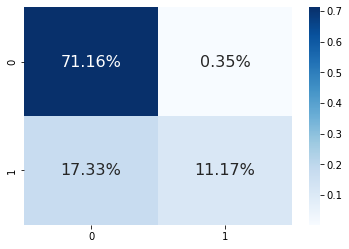

In [25]:
TN = cm1[1][0]
FN = cm1[0][0]
TP = cm1[1][1]
FP = cm1[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

def plot_confusion_matrix(cm2, title='Confusion matrix-RF', cmap=plt.cm.Blues):
    target_names=['']
    plt.imshow(cm2, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm2=confusion_matrix(y_test, predictR)
print('Confusion matrix-RF:')
print(cm2)

sns.heatmap(cm2/np.sum(cm2), annot=True, cmap = 'Blues', annot_kws={"size": 16},fmt='.2%')
plt.show()

In [26]:
#import joblib
#joblib.dump(rfc,'rfc.pkl')